In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [6]:
# Assign column names
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
             'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load dataset
pima = pd.read_csv('diabetes.csv')

# Select features and target
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = pima[feature_cols]                # Features
y = pima['Outcome']


In [8]:
# Split into train/test (75/25 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16
)


In [9]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)


c:\Users\yashd\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,16
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:

 y_pred = logreg.predict(X_test)


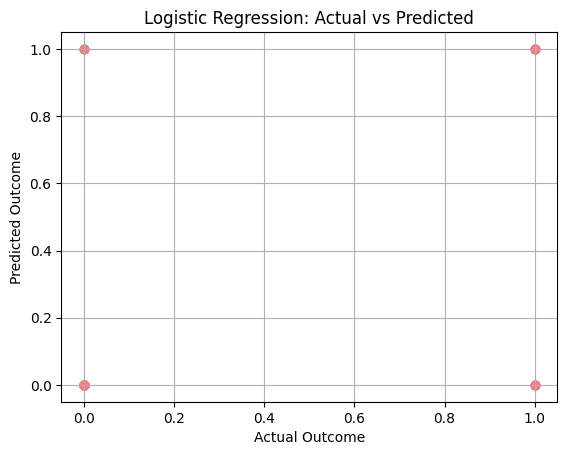

In [11]:
# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred, color='lightcoral', alpha=0.7)
plt.title('Logistic Regression: Actual vs Predicted')
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')

plt.grid(True)
plt.show()

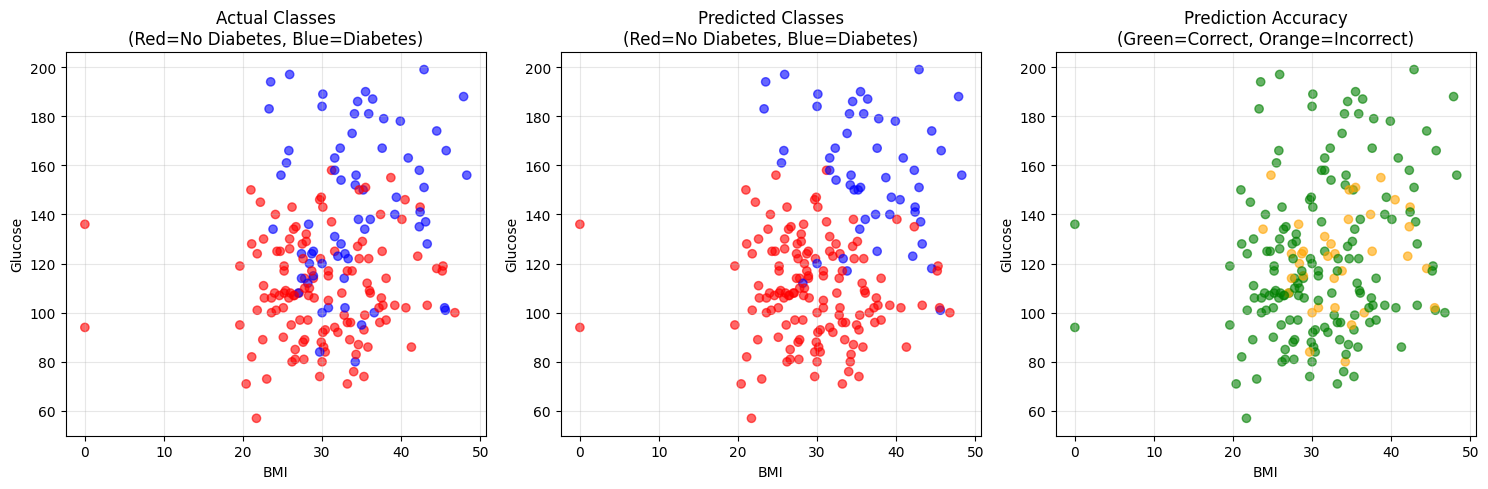


Model Accuracy: 81.77%
Total test samples: 192
Correct predictions: 157
Incorrect predictions: 35


In [12]:
# Create scatter plot with two variables
import matplotlib.pyplot as plt
import numpy as np

# Choose two variables for scatter plot
var1 = 'BMI'
var2 = 'Glucose'

# Create figure with subplots
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted on test data
plt.subplot(1, 3, 1)
colors = ['red' if x == 0 else 'blue' for x in y_test]
plt.scatter(X_test[var1], X_test[var2], c=colors, alpha=0.6)
plt.xlabel(var1)
plt.ylabel(var2)
plt.title('Actual Classes\n(Red=No Diabetes, Blue=Diabetes)')
plt.grid(True, alpha=0.3)

# Plot 2: Predicted classes
plt.subplot(1, 3, 2)
colors_pred = ['red' if x == 0 else 'blue' for x in y_pred]
plt.scatter(X_test[var1], X_test[var2], c=colors_pred, alpha=0.6)
plt.xlabel(var1)
plt.ylabel(var2)
plt.title('Predicted Classes\n(Red=No Diabetes, Blue=Diabetes)')
plt.grid(True, alpha=0.3)

# Plot 3: Correct vs Incorrect predictions
plt.subplot(1, 3, 3)
correct = y_test == y_pred
colors_accuracy = ['green' if x else 'orange' for x in correct]
plt.scatter(X_test[var1], X_test[var2], c=colors_accuracy, alpha=0.6)
plt.xlabel(var1)
plt.ylabel(var2)
plt.title('Prediction Accuracy\n(Green=Correct, Orange=Incorrect)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print accuracy
accuracy = np.mean(correct)
print(f"\nModel Accuracy: {accuracy:.2%}")
print(f"Total test samples: {len(y_test)}")
print(f"Correct predictions: {sum(correct)}")
print(f"Incorrect predictions: {len(y_test) - sum(correct)}")

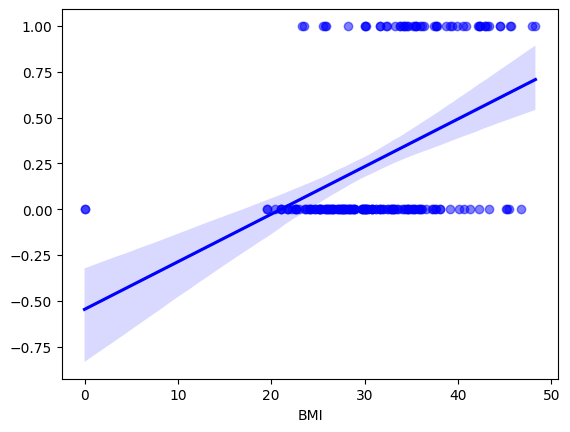

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.regplot(
    x=X_test[var1],
    y=y_pred,
    color='blue',
    scatter_kws={'alpha': 0.5}  # For the points
)
plt.show()


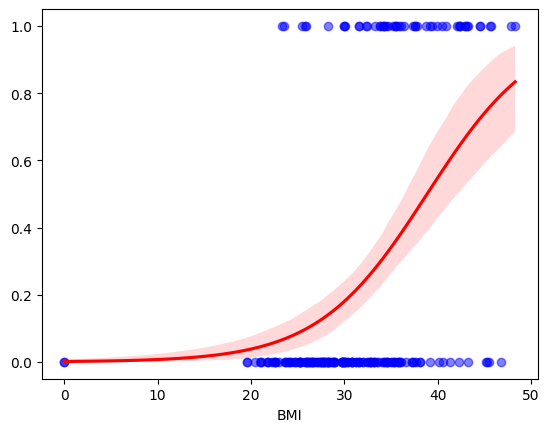

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example syntax to plot logistic regression curve
ax = sns.regplot(
    x=X_test[var1],
    y=y_pred,
    logistic=True,
    scatter_kws={'alpha': 0.5, 'color': 'blue'},
    line_kws={'color': 'red'}
)
plt.show()


In [32]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

Text(0.5, 427.9555555555555, 'Predicted label')

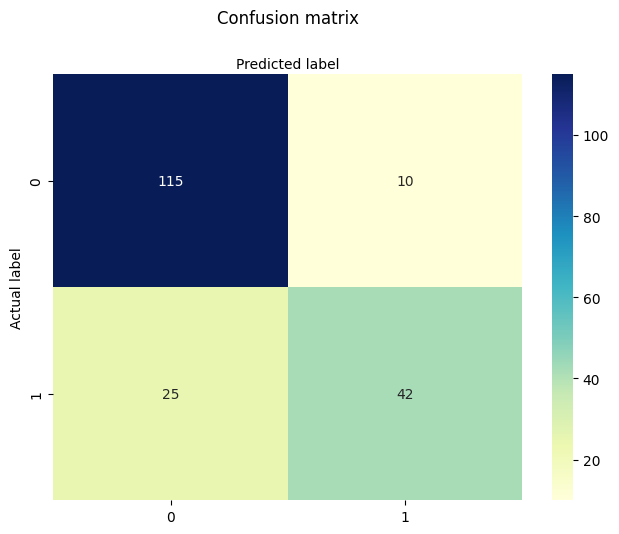

In [9]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [10]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



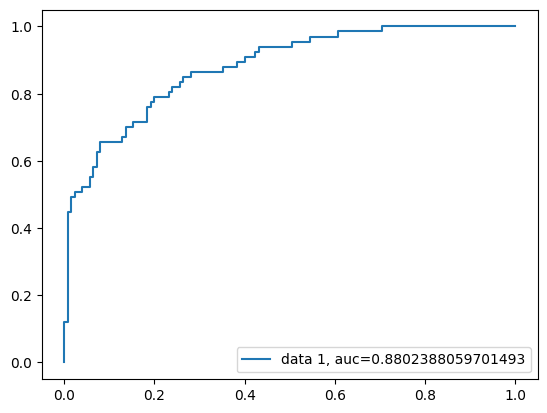

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show() 